<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/buildTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem:
Given pre-order and in-order traversals of a binary tree, write a function to reconstruct the tree.

For example, given the following preorder traversal:

[a, b, d, e, c, f, g]

And the following inorder traversal:

[d, b, e, a, f, c, g]

You should return the following tree:
````
    a
   / \
  b   c
 / \ / \
d  e f  g
````

##Solution:
To reconstruct a binary tree from its pre-order and in-order traversals:

1. Start with the root, which is the first node in the pre-order traversal.
2. Find the root in the in-order traversal to determine which nodes are in the left and right subtrees.
3. Recursively apply the above two steps to rebuild the entire tree.

##Implementation:

In [1]:
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

def buildTree(preorder, inorder):
    if not preorder or not inorder:
        return None

    root_val = preorder.pop(0)
    root = TreeNode(root_val)
    inorder_index = inorder.index(root_val)

    root.left = buildTree(preorder, inorder[:inorder_index])
    root.right = buildTree(preorder, inorder[inorder_index + 1:])

    return root

# Test
preorder = ['a', 'b', 'd', 'e', 'c', 'f', 'g']
inorder = ['d', 'b', 'e', 'a', 'f', 'c', 'g']
root = buildTree(preorder, inorder)


In [2]:
from graphviz import Digraph

class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

def buildTree(preorder, inorder):
    if not preorder or not inorder:
        return None

    root_val = preorder.pop(0)
    root = TreeNode(root_val)
    inorder_index = inorder.index(root_val)

    root.left = buildTree(preorder, inorder[:inorder_index])
    root.right = buildTree(preorder, inorder[inorder_index + 1:])

    return root

def visualize_tree(root):
    dot = Digraph(comment='Binary Tree')
    visualize_tree_helper(root, dot)
    return dot

def visualize_tree_helper(node, dot):
    if node:
        dot.node(str(node.val))
        if node.left:
            dot.edge(str(node.val), str(node.left.val))
            visualize_tree_helper(node.left, dot)
        if node.right:
            dot.edge(str(node.val), str(node.right.val))
            visualize_tree_helper(node.right, dot)
    return dot

# Test
preorder = ['a', 'b', 'd', 'e', 'c', 'f', 'g']
inorder = ['d', 'b', 'e', 'a', 'f', 'c', 'g']
root = buildTree(preorder, inorder)

graph = visualize_tree(root)
graph.view()


'Digraph.gv.pdf'

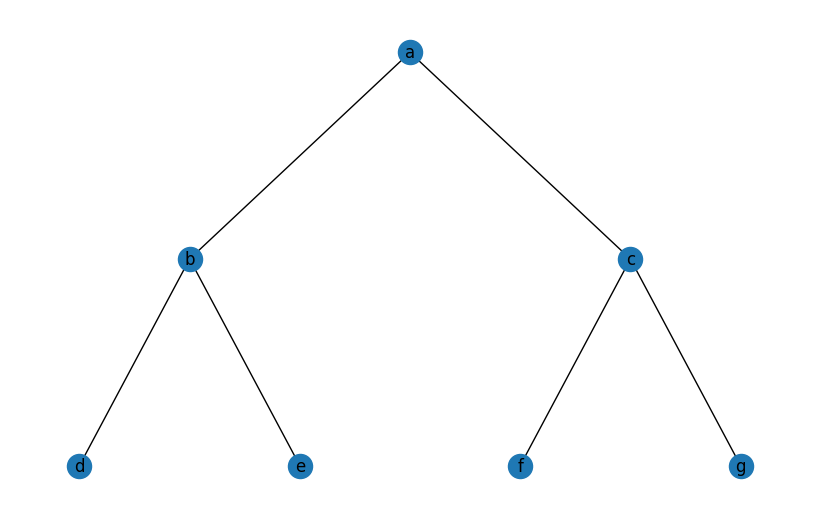

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

def buildTree(preorder, inorder):
    if not preorder or not inorder:
        return None

    root_val = preorder.pop(0)
    root = TreeNode(root_val)
    inorder_index = inorder.index(root_val)

    root.left = buildTree(preorder, inorder[:inorder_index])
    root.right = buildTree(preorder, inorder[inorder_index + 1:])

    return root

def plot_tree(root):
    graph, pos = construct_graph(root)
    plt.figure(figsize=(8, 5))
    nx.draw(graph, pos, with_labels=True, arrows=False)
    plt.show()

def construct_graph(node, graph=None, pos=None, x=0, y=0, layer=1):
    if graph is None:
        graph = nx.DiGraph()
    if pos is None:
        pos = {}
    if node is not None:
        graph.add_node(node.val)
        pos[node.val] = (x, -y)
        if node.left:
            graph.add_edge(node.val, node.left.val)
            l = x - 1 / layer
            construct_graph(node.left, graph, pos, x=l, y=y+1, layer=layer*2)
        if node.right:
            graph.add_edge(node.val, node.right.val)
            r = x + 1 / layer
            construct_graph(node.right, graph, pos, x=r, y=y+1, layer=layer*2)
    return graph, pos

# Test
preorder = ['a', 'b', 'd', 'e', 'c', 'f', 'g']
inorder = ['d', 'b', 'e', 'a', 'f', 'c', 'g']
root = buildTree(preorder, inorder)

plot_tree(root)
